In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from keras.layers import Dense, Dropout, Conv1D, MaxPooling1D, Flatten, GRU
from keras.models import Sequential
from keras.optimizers import Adam
from keras.regularizers import l2
from keras.losses import CategoricalCrossentropy
from keras.callbacks import EarlyStopping

def preprocess_data(data):
    # Unpack data
    X_train_valid = data['X_train_valid']
    y_train_valid = data['y_train_valid']
    X_test = data['X_test']
    y_test = data['y_test']

    # One-hot Encoding for y data
    encoder = LabelBinarizer()
    y_train_valid = encoder.fit_transform(y_train_valid)
    y_test = encoder.fit_transform(y_test)

    # Splitting training and validation data
    X_train, X_val, y_train, y_val = train_test_split(X_train_valid, y_train_valid, test_size=0.2, random_state=42)

    total_y_train = y_train
    total_y_val = y_val
    total_y_test = y_test

    # Trim
    X_train = X_train[:,:,0:800]
    X_val = X_val[:,:,0:800]
    X_test = X_test[:,:,0:800]

    # Maxpooling
    total_X_train = np.max(X_train.reshape(X_train.shape[0], X_train.shape[1], -1, 4), axis=3)
    total_X_val = np.max(X_val.reshape(X_val.shape[0], X_val.shape[1], -1, 4), axis=3)
    total_X_test = np.max(X_test.reshape(X_test.shape[0], X_test.shape[1], -1, 4), axis=3)

    # Validation and Test Data augmentation stops here (reshaping purposes)
    # Averaging and Subsampling below only apply to Training Data

    # Average every 4 timesteps
    X_train_average = np.mean(X_train.reshape(X_train.shape[0], X_train.shape[1], -1, 4), axis=3)
    X_train_average += np.random.normal(0.0, 0.5, X_train_average.shape)
    total_X_train = np.vstack((total_X_train, X_train_average))
    total_y_train = np.vstack((total_y_train, y_train))

    # Subsample every 4 time-dumps
    for i in range(0, 4):
        X_train_subsample = X_train[:, :, i::4] + np.random.normal(0.0, 0.5, X_train[:, :,i::4].shape)
        total_X_train = np.vstack((total_X_train, X_train_subsample))
        total_y_train = np.vstack((total_y_train, y_train))

    return {'total_X_train': total_X_train, 'total_X_test': total_X_test,
            'total_X_val': total_X_val, 'total_y_val': total_y_val,
            'total_y_train': total_y_train, 'total_y_test': total_y_test}

(2115, 22, 1000)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 25, 22)            4862      
                                                                 
 max_pooling1d (MaxPooling1  (None, 12, 22)            0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 12, 22)            0         
                                                                 
 conv1d_1 (Conv1D)           (None, 12, 22)            4862      
                                                                 
 max_pooling1d_1 (MaxPoolin  (None, 6, 22)             0         
 g1D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 6, 22)             0

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/backend.py:5575: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


16/16 [==============================] - 1s 36ms/step - loss: 5.2210 - accuracy: 0.2498 - val_loss: 3.8788 - val_accuracy: 0.2719
Epoch 2/75
16/16 [==============================] - 0s 26ms/step - loss: 4.5770 - accuracy: 0.2652 - val_loss: 3.5897 - val_accuracy: 0.2884
Epoch 3/75
16/16 [==============================] - 0s 18ms/step - loss: 4.1569 - accuracy: 0.2610 - val_loss: 3.4618 - val_accuracy: 0.2671
Epoch 4/75
16/16 [==============================] - 0s 17ms/step - loss: 3.8444 - accuracy: 0.2664 - val_loss: 3.2818 - val_accuracy: 0.2884
Epoch 5/75
16/16 [==============================] - 0s 17ms/step - loss: 3.6387 - accuracy: 0.2582 - val_loss: 3.1518 - val_accuracy: 0.2931
Epoch 6/75
16/16 [==============================] - 0s 17ms/step - loss: 3.4001 - accuracy: 0.2642 - val_loss: 3.0153 - val_accuracy: 0.3404
Epoch 7/75
16/16 [==============================] - 0s 18ms/step - loss: 3.2366 - accuracy: 0.2656 - val_loss: 2.9113 - val_accuracy: 0.3002
Epoch 8/75
16/16 [======

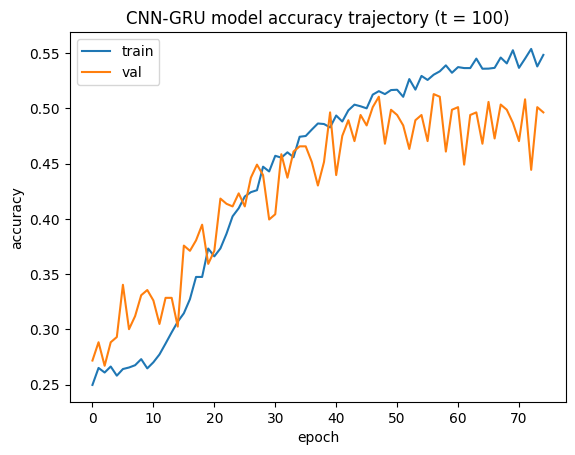

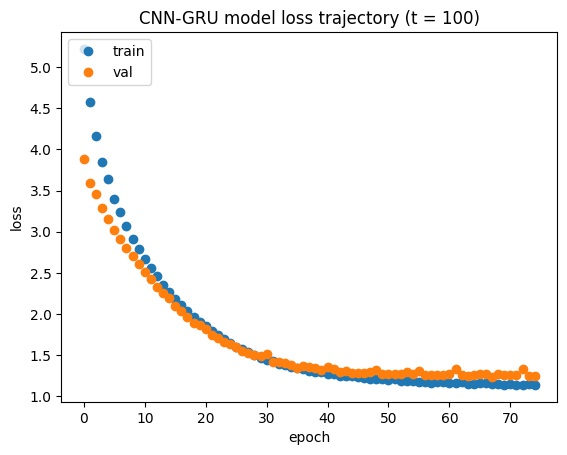

Test accuracy of the CNN-GRU model: 0.519187331199646
(2115, 22, 1000)


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_2 (Conv1D)           (None, 50, 22)            4862      
                                                                 
 max_pooling1d_2 (MaxPoolin  (None, 25, 22)            0         
 g1D)                                                            
                                                                 
 dropout_4 (Dropout)         (None, 25, 22)            0         
                                                                 
 conv1d_3 (Conv1D)           (None, 25, 22)            4862      
                                                                 
 max_pooling1d_3 (MaxPoolin  (None, 12, 22)            0         
 g1D)                                                            
                                                                 
 dropout_5 (Dropout)         (None, 12, 22)           

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/backend.py:5575: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


16/16 [==============================] - 2s 44ms/step - loss: 5.4148 - accuracy: 0.2530 - val_loss: 3.7713 - val_accuracy: 0.3002
Epoch 2/75
16/16 [==============================] - 0s 28ms/step - loss: 4.7365 - accuracy: 0.2620 - val_loss: 3.5435 - val_accuracy: 0.3381
Epoch 3/75
16/16 [==============================] - 0s 30ms/step - loss: 4.2912 - accuracy: 0.2688 - val_loss: 3.4091 - val_accuracy: 0.3286
Epoch 4/75
16/16 [==============================] - 0s 30ms/step - loss: 4.0009 - accuracy: 0.2732 - val_loss: 3.2937 - val_accuracy: 0.3357
Epoch 5/75
16/16 [==============================] - 0s 30ms/step - loss: 3.7473 - accuracy: 0.2717 - val_loss: 3.2087 - val_accuracy: 0.3310
Epoch 6/75
16/16 [==============================] - 0s 29ms/step - loss: 3.5143 - accuracy: 0.2813 - val_loss: 3.0466 - val_accuracy: 0.3783
Epoch 7/75
16/16 [==============================] - 1s 37ms/step - loss: 3.3442 - accuracy: 0.2822 - val_loss: 2.9558 - val_accuracy: 0.3428
Epoch 8/75
16/16 [======

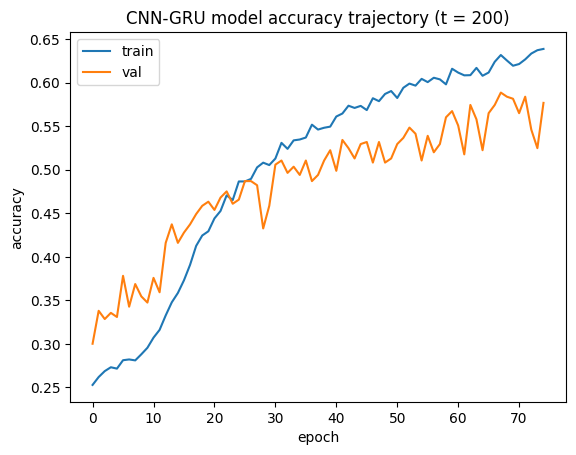

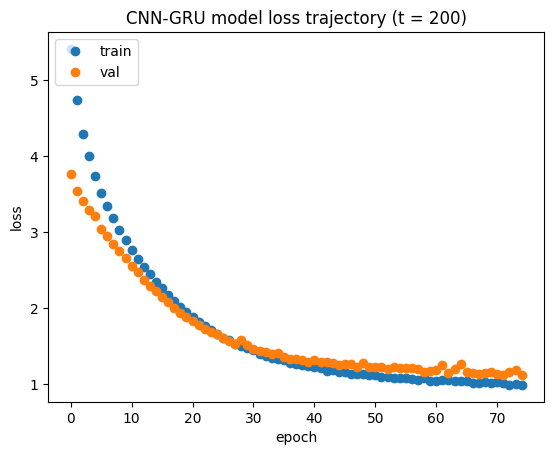

Test accuracy of the CNN-GRU model: 0.6117381453514099
(2115, 22, 1000)


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_4 (Conv1D)           (None, 75, 22)            4862      
                                                                 
 max_pooling1d_4 (MaxPoolin  (None, 37, 22)            0         
 g1D)                                                            
                                                                 
 dropout_8 (Dropout)         (None, 37, 22)            0         
                                                                 
 conv1d_5 (Conv1D)           (None, 37, 22)            4862      
                                                                 
 max_pooling1d_5 (MaxPoolin  (None, 18, 22)            0         
 g1D)                                                            
                                                                 
 dropout_9 (Dropout)         (None, 18, 22)           

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/backend.py:5575: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


16/16 [==============================] - 2s 51ms/step - loss: 5.5657 - accuracy: 0.2575 - val_loss: 3.9883 - val_accuracy: 0.2742
Epoch 2/75
16/16 [==============================] - 1s 41ms/step - loss: 4.9325 - accuracy: 0.2662 - val_loss: 3.7625 - val_accuracy: 0.2648
Epoch 3/75
16/16 [==============================] - 1s 41ms/step - loss: 4.4629 - accuracy: 0.2682 - val_loss: 3.4497 - val_accuracy: 0.3310
Epoch 4/75
16/16 [==============================] - 1s 40ms/step - loss: 4.1328 - accuracy: 0.2754 - val_loss: 3.3607 - val_accuracy: 0.3097
Epoch 5/75
16/16 [==============================] - 1s 40ms/step - loss: 3.8842 - accuracy: 0.2718 - val_loss: 3.2763 - val_accuracy: 0.2979
Epoch 6/75
16/16 [==============================] - 1s 42ms/step - loss: 3.6310 - accuracy: 0.2819 - val_loss: 3.0990 - val_accuracy: 0.3522
Epoch 7/75
16/16 [==============================] - 1s 50ms/step - loss: 3.4392 - accuracy: 0.2862 - val_loss: 3.0223 - val_accuracy: 0.3286
Epoch 8/75
16/16 [======

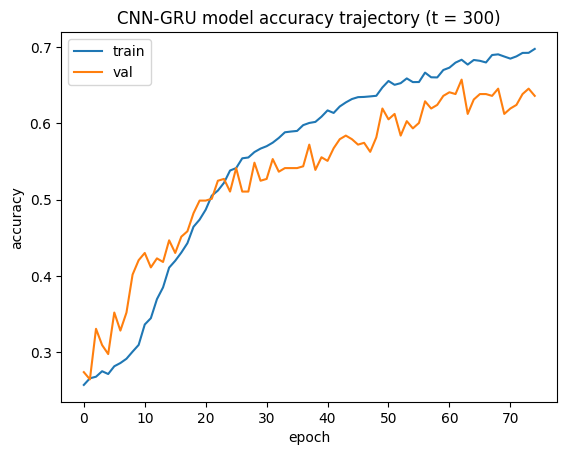

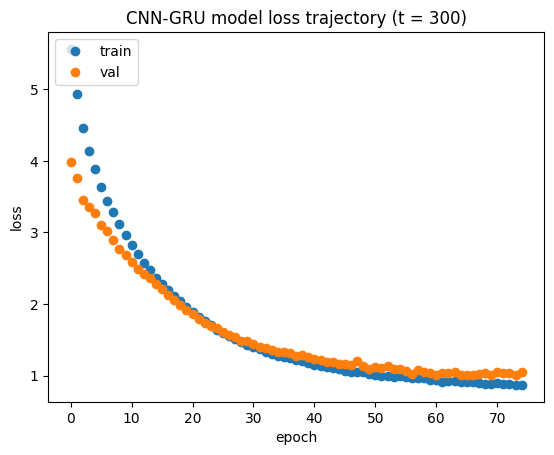

Test accuracy of the CNN-GRU model: 0.6455981731414795
(2115, 22, 1000)


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_6 (Conv1D)           (None, 100, 22)           4862      
                                                                 
 max_pooling1d_6 (MaxPoolin  (None, 50, 22)            0         
 g1D)                                                            
                                                                 
 dropout_12 (Dropout)        (None, 50, 22)            0         
                                                                 
 conv1d_7 (Conv1D)           (None, 50, 22)            4862      
                                                                 
 max_pooling1d_7 (MaxPoolin  (None, 25, 22)            0         
 g1D)                                                            
                                                                 
 dropout_13 (Dropout)        (None, 25, 22)           

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/backend.py:5575: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


16/16 [==============================] - 2s 84ms/step - loss: 5.6785 - accuracy: 0.2591 - val_loss: 3.8307 - val_accuracy: 0.3144
Epoch 2/75
16/16 [==============================] - 1s 68ms/step - loss: 4.9394 - accuracy: 0.2790 - val_loss: 3.5755 - val_accuracy: 0.3310
Epoch 3/75
16/16 [==============================] - 1s 69ms/step - loss: 4.5677 - accuracy: 0.2842 - val_loss: 3.4342 - val_accuracy: 0.3475
Epoch 4/75
16/16 [==============================] - 1s 76ms/step - loss: 4.1999 - accuracy: 0.2934 - val_loss: 3.3301 - val_accuracy: 0.3617
Epoch 5/75
16/16 [==============================] - 1s 72ms/step - loss: 3.9053 - accuracy: 0.2903 - val_loss: 3.1835 - val_accuracy: 0.3499
Epoch 6/75
16/16 [==============================] - 1s 72ms/step - loss: 3.6703 - accuracy: 0.2992 - val_loss: 3.0814 - val_accuracy: 0.3664
Epoch 7/75
16/16 [==============================] - 1s 71ms/step - loss: 3.4653 - accuracy: 0.3026 - val_loss: 2.9631 - val_accuracy: 0.3783
Epoch 8/75
16/16 [======

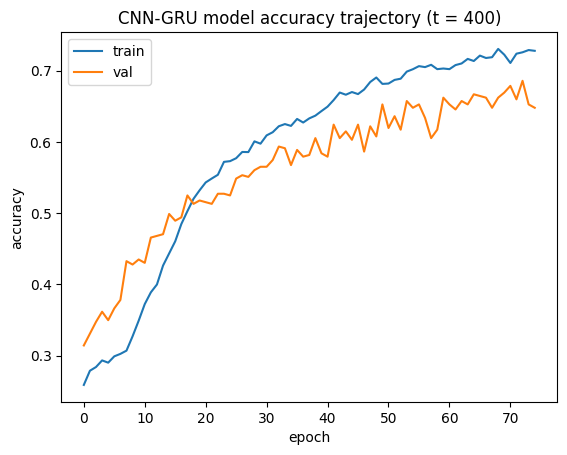

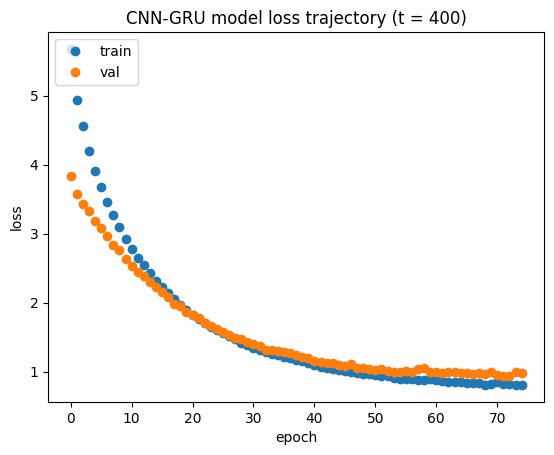

Test accuracy of the CNN-GRU model: 0.6749435663223267
(2115, 22, 1000)


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_8 (Conv1D)           (None, 125, 22)           4862      
                                                                 
 max_pooling1d_8 (MaxPoolin  (None, 62, 22)            0         
 g1D)                                                            
                                                                 
 dropout_16 (Dropout)        (None, 62, 22)            0         
                                                                 
 conv1d_9 (Conv1D)           (None, 62, 22)            4862      
                                                                 
 max_pooling1d_9 (MaxPoolin  (None, 31, 22)            0         
 g1D)                                                            
                                                                 
 dropout_17 (Dropout)        (None, 31, 22)           

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/backend.py:5575: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


16/16 [==============================] - 3s 107ms/step - loss: 5.4629 - accuracy: 0.2619 - val_loss: 3.8789 - val_accuracy: 0.3310
Epoch 2/75
16/16 [==============================] - 1s 79ms/step - loss: 4.7703 - accuracy: 0.2928 - val_loss: 3.6397 - val_accuracy: 0.3452
Epoch 3/75
16/16 [==============================] - 1s 82ms/step - loss: 4.3942 - accuracy: 0.2926 - val_loss: 3.5164 - val_accuracy: 0.3593
Epoch 4/75
16/16 [==============================] - 1s 88ms/step - loss: 4.0790 - accuracy: 0.2870 - val_loss: 3.3357 - val_accuracy: 0.3712
Epoch 5/75
16/16 [==============================] - 1s 81ms/step - loss: 3.7684 - accuracy: 0.3115 - val_loss: 3.1546 - val_accuracy: 0.3972
Epoch 6/75
16/16 [==============================] - 1s 85ms/step - loss: 3.5548 - accuracy: 0.3171 - val_loss: 3.0918 - val_accuracy: 0.3783
Epoch 7/75
16/16 [==============================] - 1s 87ms/step - loss: 3.3525 - accuracy: 0.3254 - val_loss: 2.9669 - val_accuracy: 0.3877
Epoch 8/75
16/16 [=====

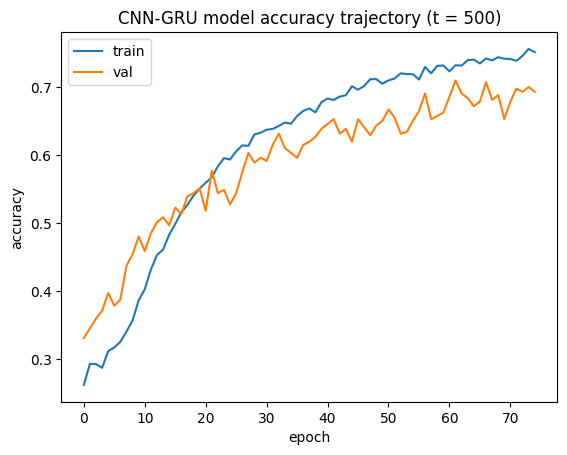

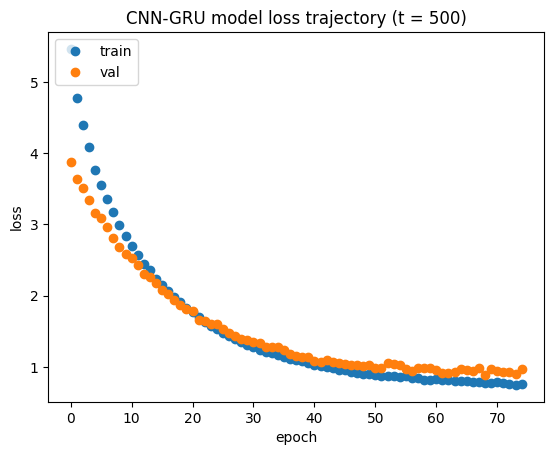

Test accuracy of the CNN-GRU model: 0.6772009134292603
(2115, 22, 1000)


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_10 (Conv1D)          (None, 150, 22)           4862      
                                                                 
 max_pooling1d_10 (MaxPooli  (None, 75, 22)            0         
 ng1D)                                                           
                                                                 
 dropout_20 (Dropout)        (None, 75, 22)            0         
                                                                 
 conv1d_11 (Conv1D)          (None, 75, 22)            4862      
                                                                 
 max_pooling1d_11 (MaxPooli  (None, 37, 22)            0         
 ng1D)                                                           
                                                                 
 dropout_21 (Dropout)        (None, 37, 22)           

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/backend.py:5575: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


16/16 [==============================] - 3s 110ms/step - loss: 5.6360 - accuracy: 0.2677 - val_loss: 4.0146 - val_accuracy: 0.3262
Epoch 2/75
16/16 [==============================] - 2s 99ms/step - loss: 4.9904 - accuracy: 0.2872 - val_loss: 3.7483 - val_accuracy: 0.3357
Epoch 3/75
16/16 [==============================] - 2s 102ms/step - loss: 4.5290 - accuracy: 0.3007 - val_loss: 3.4961 - val_accuracy: 0.3546
Epoch 4/75
16/16 [==============================] - 2s 106ms/step - loss: 4.1801 - accuracy: 0.3051 - val_loss: 3.3598 - val_accuracy: 0.3664
Epoch 5/75
16/16 [==============================] - 2s 102ms/step - loss: 3.8822 - accuracy: 0.3124 - val_loss: 3.1848 - val_accuracy: 0.4161
Epoch 6/75
16/16 [==============================] - 2s 103ms/step - loss: 3.6111 - accuracy: 0.3323 - val_loss: 3.0904 - val_accuracy: 0.4421
Epoch 7/75
16/16 [==============================] - 2s 103ms/step - loss: 3.3931 - accuracy: 0.3479 - val_loss: 2.9058 - val_accuracy: 0.4492
Epoch 8/75
16/16 [

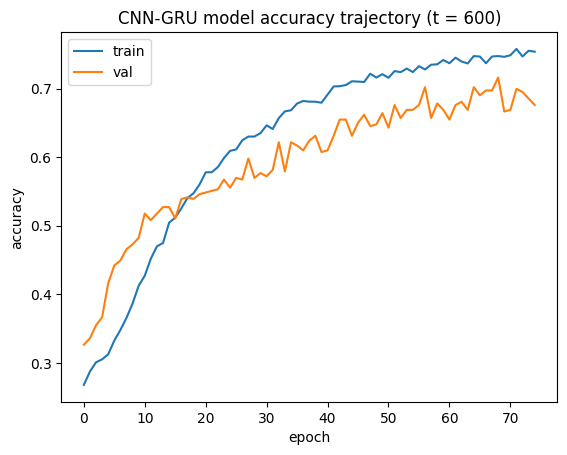

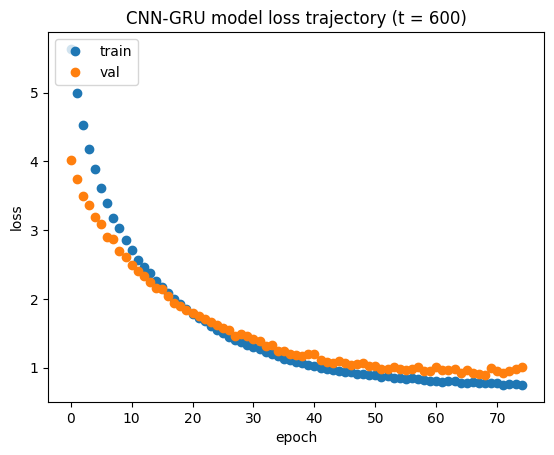

Test accuracy of the CNN-GRU model: 0.6772009134292603
(2115, 22, 1000)


Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_12 (Conv1D)          (None, 175, 22)           4862      
                                                                 
 max_pooling1d_12 (MaxPooli  (None, 87, 22)            0         
 ng1D)                                                           
                                                                 
 dropout_24 (Dropout)        (None, 87, 22)            0         
                                                                 
 conv1d_13 (Conv1D)          (None, 87, 22)            4862      
                                                                 
 max_pooling1d_13 (MaxPooli  (None, 43, 22)            0         
 ng1D)                                                           
                                                                 
 dropout_25 (Dropout)        (None, 43, 22)           

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/backend.py:5575: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


16/16 [==============================] - 3s 131ms/step - loss: 5.5726 - accuracy: 0.2586 - val_loss: 3.9597 - val_accuracy: 0.3050
Epoch 2/75
16/16 [==============================] - 2s 124ms/step - loss: 4.9047 - accuracy: 0.2867 - val_loss: 3.7082 - val_accuracy: 0.3499
Epoch 3/75
16/16 [==============================] - 2s 127ms/step - loss: 4.4691 - accuracy: 0.2918 - val_loss: 3.6067 - val_accuracy: 0.3286
Epoch 4/75
16/16 [==============================] - 2s 124ms/step - loss: 4.1188 - accuracy: 0.3000 - val_loss: 3.4123 - val_accuracy: 0.3593
Epoch 5/75
16/16 [==============================] - 2s 118ms/step - loss: 3.8550 - accuracy: 0.3022 - val_loss: 3.2346 - val_accuracy: 0.3948
Epoch 6/75
16/16 [==============================] - 2s 125ms/step - loss: 3.5989 - accuracy: 0.3099 - val_loss: 3.1138 - val_accuracy: 0.3735
Epoch 7/75
16/16 [==============================] - 2s 120ms/step - loss: 3.4071 - accuracy: 0.3212 - val_loss: 3.0141 - val_accuracy: 0.3830
Epoch 8/75
16/16 

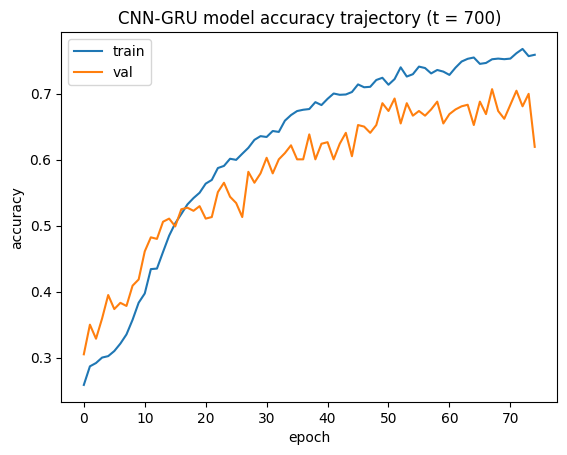

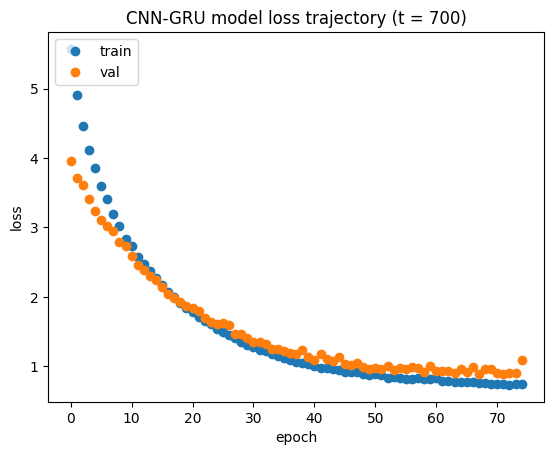

Test accuracy of the CNN-GRU model: 0.6207674741744995
(2115, 22, 1000)


Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_14 (Conv1D)          (None, 200, 22)           4862      
                                                                 
 max_pooling1d_14 (MaxPooli  (None, 100, 22)           0         
 ng1D)                                                           
                                                                 
 dropout_28 (Dropout)        (None, 100, 22)           0         
                                                                 
 conv1d_15 (Conv1D)          (None, 100, 22)           4862      
                                                                 
 max_pooling1d_15 (MaxPooli  (None, 50, 22)            0         
 ng1D)                                                           
                                                                 
 dropout_29 (Dropout)        (None, 50, 22)           

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/backend.py:5575: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


16/16 [==============================] - 4s 198ms/step - loss: 5.8073 - accuracy: 0.2577 - val_loss: 4.0834 - val_accuracy: 0.2719
Epoch 2/75
16/16 [==============================] - 3s 185ms/step - loss: 5.0981 - accuracy: 0.2838 - val_loss: 3.8562 - val_accuracy: 0.3144
Epoch 3/75
16/16 [==============================] - 3s 184ms/step - loss: 4.6598 - accuracy: 0.2934 - val_loss: 3.6715 - val_accuracy: 0.3026
Epoch 4/75
16/16 [==============================] - 3s 192ms/step - loss: 4.2875 - accuracy: 0.3053 - val_loss: 3.4443 - val_accuracy: 0.3168
Epoch 5/75
16/16 [==============================] - 3s 205ms/step - loss: 4.0272 - accuracy: 0.2975 - val_loss: 3.3145 - val_accuracy: 0.3404
Epoch 6/75
16/16 [==============================] - 3s 210ms/step - loss: 3.7599 - accuracy: 0.3128 - val_loss: 3.2548 - val_accuracy: 0.3712
Epoch 7/75
16/16 [==============================] - 3s 215ms/step - loss: 3.5565 - accuracy: 0.3142 - val_loss: 3.0922 - val_accuracy: 0.3617
Epoch 8/75
16/16 

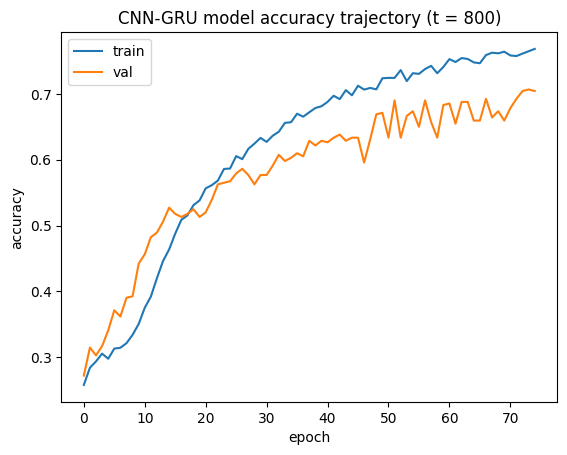

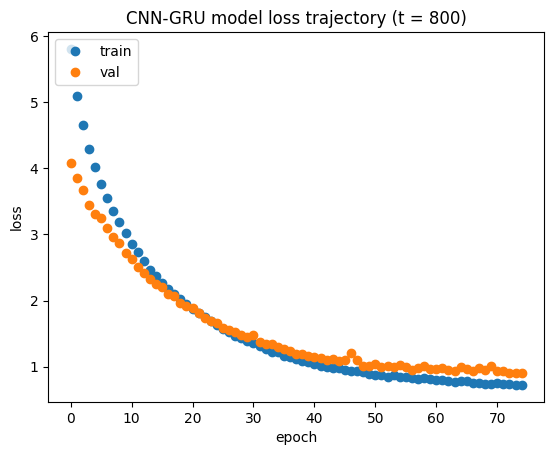

Test accuracy of the CNN-GRU model: 0.6681715846061707
(2115, 22, 1000)


Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_16 (Conv1D)          (None, 200, 22)           4862      
                                                                 
 max_pooling1d_16 (MaxPooli  (None, 100, 22)           0         
 ng1D)                                                           
                                                                 
 dropout_32 (Dropout)        (None, 100, 22)           0         
                                                                 
 conv1d_17 (Conv1D)          (None, 100, 22)           4862      
                                                                 
 max_pooling1d_17 (MaxPooli  (None, 50, 22)            0         
 ng1D)                                                           
                                                                 
 dropout_33 (Dropout)        (None, 50, 22)           

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/backend.py:5575: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


16/16 [==============================] - 5s 226ms/step - loss: 5.7497 - accuracy: 0.2681 - val_loss: 3.9327 - val_accuracy: 0.3121
Epoch 2/75
16/16 [==============================] - 3s 183ms/step - loss: 5.1387 - accuracy: 0.2901 - val_loss: 3.7946 - val_accuracy: 0.3239
Epoch 3/75
16/16 [==============================] - 3s 198ms/step - loss: 4.6879 - accuracy: 0.2889 - val_loss: 3.5000 - val_accuracy: 0.3830
Epoch 4/75
16/16 [==============================] - 3s 184ms/step - loss: 4.2948 - accuracy: 0.3022 - val_loss: 3.3518 - val_accuracy: 0.3853
Epoch 5/75
16/16 [==============================] - 3s 192ms/step - loss: 4.0149 - accuracy: 0.3053 - val_loss: 3.1938 - val_accuracy: 0.3783
Epoch 6/75
16/16 [==============================] - 4s 225ms/step - loss: 3.7503 - accuracy: 0.3135 - val_loss: 3.0739 - val_accuracy: 0.3924
Epoch 7/75
16/16 [==============================] - 4s 225ms/step - loss: 3.5088 - accuracy: 0.3286 - val_loss: 3.0451 - val_accuracy: 0.3972
Epoch 8/75
16/16 

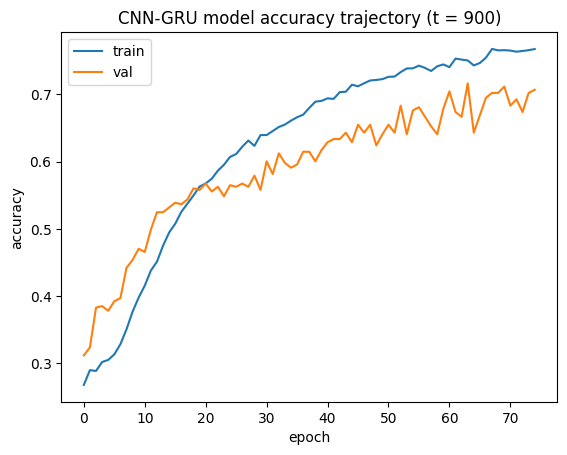

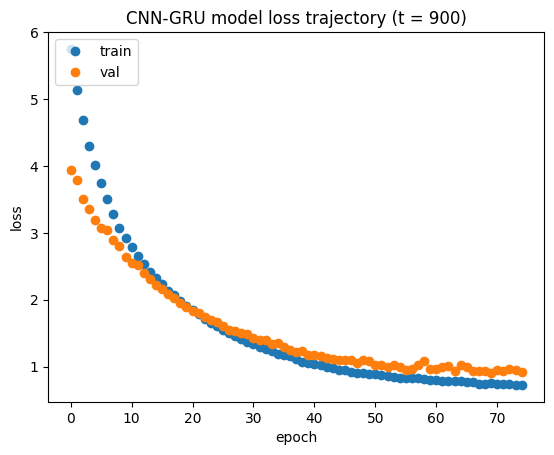

Test accuracy of the CNN-GRU model: 0.7020316123962402
(2115, 22, 1000)


Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_18 (Conv1D)          (None, 200, 22)           4862      
                                                                 
 max_pooling1d_18 (MaxPooli  (None, 100, 22)           0         
 ng1D)                                                           
                                                                 
 dropout_36 (Dropout)        (None, 100, 22)           0         
                                                                 
 conv1d_19 (Conv1D)          (None, 100, 22)           4862      
                                                                 
 max_pooling1d_19 (MaxPooli  (None, 50, 22)            0         
 ng1D)                                                           
                                                                 
 dropout_37 (Dropout)        (None, 50, 22)           

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/backend.py:5575: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


16/16 [==============================] - 4s 189ms/step - loss: 5.8221 - accuracy: 0.2611 - val_loss: 3.9936 - val_accuracy: 0.3381
Epoch 2/75
16/16 [==============================] - 3s 192ms/step - loss: 5.1543 - accuracy: 0.2887 - val_loss: 3.9416 - val_accuracy: 0.3381
Epoch 3/75
16/16 [==============================] - 3s 213ms/step - loss: 4.7006 - accuracy: 0.2901 - val_loss: 3.6584 - val_accuracy: 0.3546
Epoch 4/75
16/16 [==============================] - 3s 205ms/step - loss: 4.3420 - accuracy: 0.2953 - val_loss: 3.4661 - val_accuracy: 0.3570
Epoch 5/75
16/16 [==============================] - 3s 218ms/step - loss: 4.0440 - accuracy: 0.2977 - val_loss: 3.3341 - val_accuracy: 0.3712
Epoch 6/75
16/16 [==============================] - 4s 218ms/step - loss: 3.7469 - accuracy: 0.3126 - val_loss: 3.2198 - val_accuracy: 0.3593
Epoch 7/75
16/16 [==============================] - 3s 213ms/step - loss: 3.5516 - accuracy: 0.3168 - val_loss: 3.0732 - val_accuracy: 0.4090
Epoch 8/75
16/16 

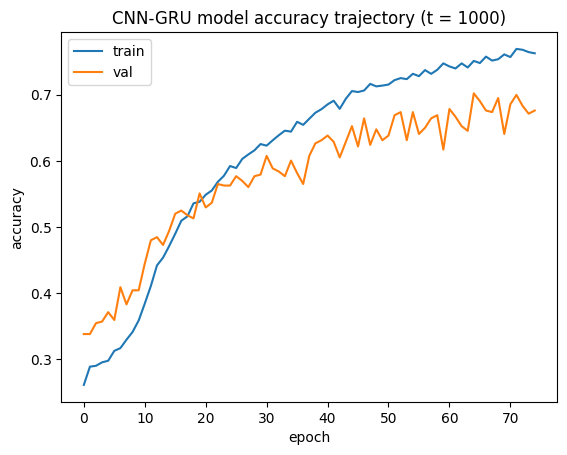

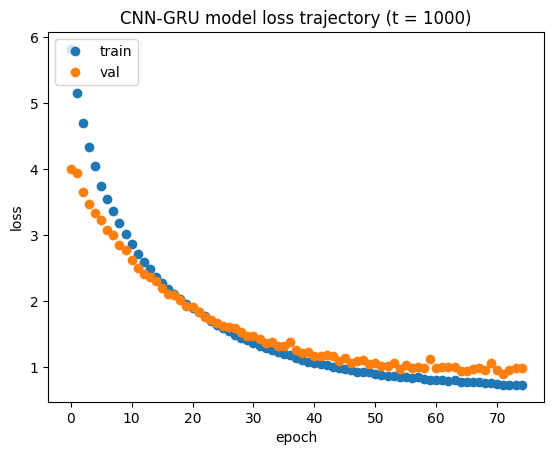

Test accuracy of the CNN-GRU model: 0.6794582605361938


In [4]:
for i in np.arange(1, 11):
    # Load original data
    X_test = np.load("../ECEC147project-data/X_test.npy")
    y_test = np.load("../ECEC147project-data//y_test.npy")
    person_train_valid = np.load("../ECEC147project-data//person_train_valid.npy")
    X_train_valid = np.load("../ECEC147project-data/X_train_valid.npy")
    print(X_train_valid.shape)
    y_train_valid = np.load("../ECEC147project-data/y_train_valid.npy")
    person_test = np.load("../ECEC147project-data/person_test.npy")


    X_test_slice = X_test[:,:,0:i*100]
    X_train_valid_slice = X_train_valid[:,:,0:i*100]

    data = dict()
    data['X_train_valid'] = X_train_valid_slice
    data['y_train_valid'] = y_train_valid
    data['X_test'] = X_test_slice
    data['y_test'] = y_test
    data['person_train_valid'] = person_train_valid
    data['person_test'] = person_test
    preprocessed_data = preprocess_data(data)

    # Load preprocessed data
    X_train = preprocessed_data['total_X_train']
    y_train = preprocessed_data['total_y_train']
    X_val = preprocessed_data['total_X_val']
    y_val = preprocessed_data['total_y_val']
    X_test = preprocessed_data['total_X_test']
    y_test = preprocessed_data['total_y_test']
    X_train = np.transpose(X_train, (0, 2, 1))
    X_val = np.transpose(X_val, (0, 2, 1))
    X_test = np.transpose(X_test, (0, 2, 1))


    # Model Architecture
    CNN_GRU = Sequential()

    CNN_GRU.add(Conv1D(22, 10, input_shape=(X_train.shape[1], X_train.shape[2]),padding='same', kernel_regularizer=l2(0.03)))
    CNN_GRU.add(MaxPooling1D(2))
    CNN_GRU.add(Dropout(0.5))
    CNN_GRU.add(Conv1D(22, 10, input_shape=(X_train.shape[1]/2, X_train.shape[2]),padding='same', kernel_regularizer=l2(0.03)))
    CNN_GRU.add(MaxPooling1D(2))
    CNN_GRU.add(Dropout(0.5))
    CNN_GRU.add(GRU(44, kernel_regularizer=l2(0.03), return_sequences=True))
    CNN_GRU.add(Dropout(0.5))
    CNN_GRU.add(Flatten())
    CNN_GRU.add(Dense(64))
    CNN_GRU.add(Dropout(0.5))
    CNN_GRU.add(Dense(4, activation='softmax'))

    optimizer = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, amsgrad=False)

    early_stopping = EarlyStopping(monitor='val_loss', patience=15, verbose=1, restore_best_weights=True)

    CNN_GRU.compile(optimizer=optimizer, loss=CategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

    CNN_GRU.summary()


    CNN_GRU_results = CNN_GRU.fit(X_train, y_train, epochs=75, batch_size=640, validation_data=(X_val, y_val), shuffle=True, verbose=1, callbacks=[])

    # Plotting accuracy trajectory
    plt.plot(CNN_GRU_results.history['accuracy'])
    plt.plot(CNN_GRU_results.history['val_accuracy'])
    plt.title('CNN-GRU model accuracy trajectory (t = {})'.format(i*100))
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()

    # Plotting loss trajectory
    plt.plot(CNN_GRU_results.history['loss'],'o')
    plt.plot(CNN_GRU_results.history['val_loss'],'o')
    plt.title('CNN-GRU model loss trajectory (t = {})'.format(i*100))
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()

    ## Testing the model
    CNN_GRU_score = CNN_GRU.evaluate(X_test, y_test, verbose=0)
    print('Test accuracy of the CNN-GRU model:',CNN_GRU_score[1])

